<a href="https://colab.research.google.com/github/Sukh-vip3r/82-days-machine-learning/blob/master/ids_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Data from local drive**

In [30]:
from google.colab import files
uploaded = files.upload()

Saving Wine.csv to Wine (1).csv


*Importing the required packages*

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [32]:
wine_data=pd.read_csv('Wine.csv')
wine_data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


Knowing the data shape and size of the data

In [33]:
wine_data.shape

(178, 14)

**Performing exploratory analysis on the data.**

*   Check if have null values in the data



In [34]:
wine_data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64



*   Check if data have na values or not



In [35]:
wine_data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

**Check if we have some categorial Values or not**

In [36]:
wine_data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

In [37]:
columns=wine_data.columns.tolist()
columns.remove('Customer_Segment')
columns

['Alcohol',
 'Malic_Acid',
 'Ash',
 'Ash_Alcanity',
 'Magnesium',
 'Total_Phenols',
 'Flavanoids',
 'Nonflavanoid_Phenols',
 'Proanthocyanins',
 'Color_Intensity',
 'Hue',
 'OD280',
 'Proline']

**Plot the distribution of all the features to check if data is skewed or not**

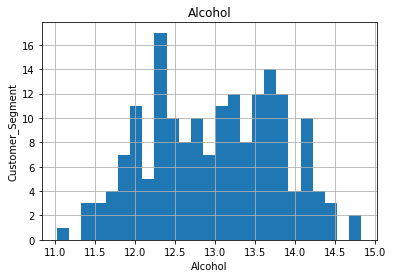

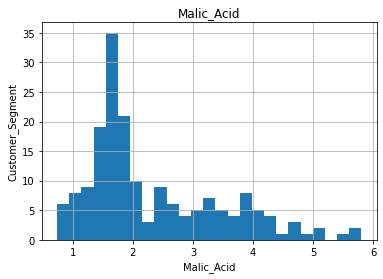

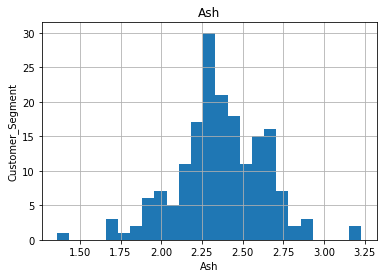

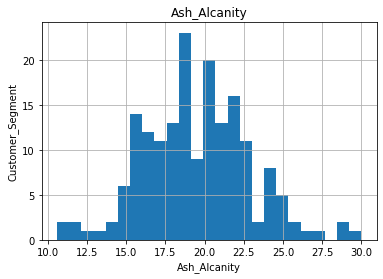

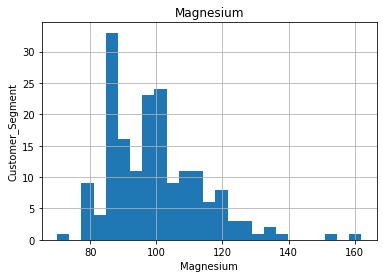

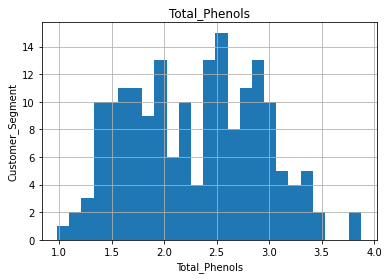

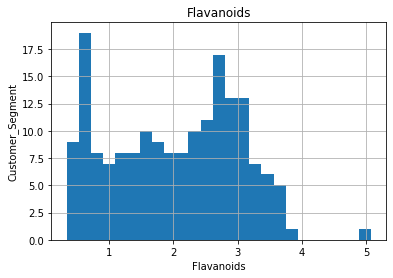

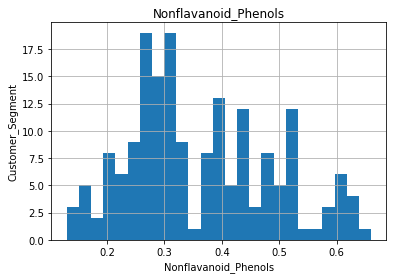

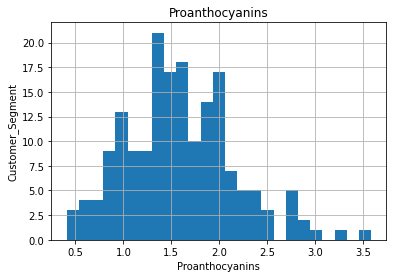

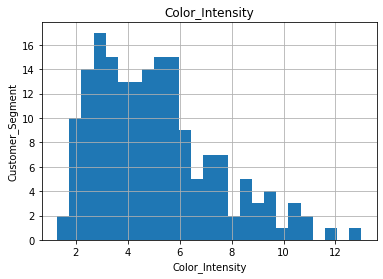

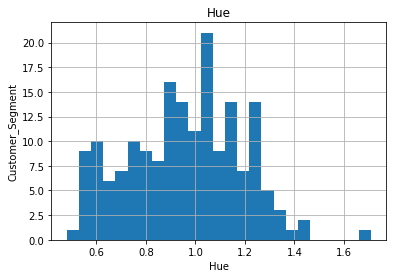

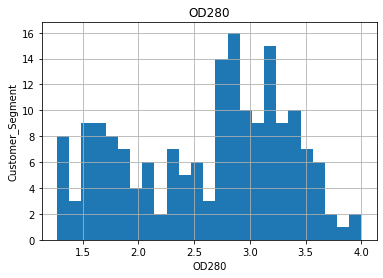

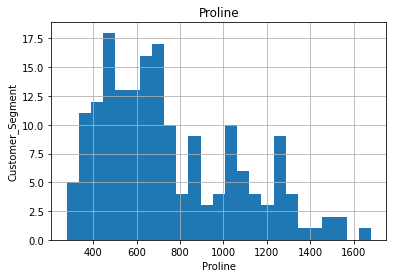

In [38]:
for feature in columns:
  data=wine_data.copy()
  data[feature].hist(bins=25)
  plt.xlabel(feature)
  plt.ylabel('Customer_Segment')
  plt.title(feature)
  plt.show()

*As we can see that data is skewed in some cases so we apply **log transformation** on the data so that it can be corrected*

In [39]:
for feature in columns:
  wine_data[feature]=np.log(wine_data[feature])


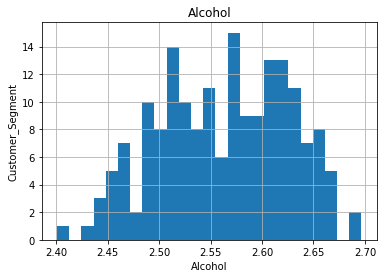

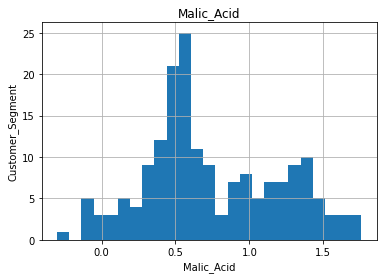

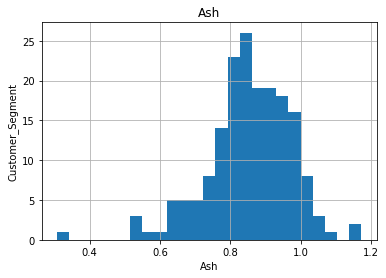

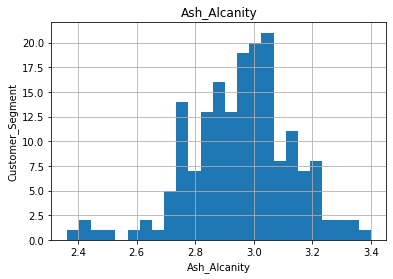

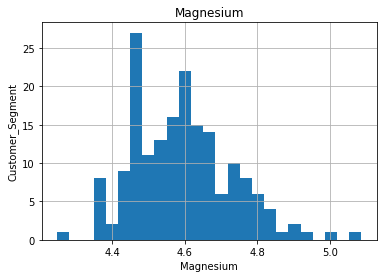

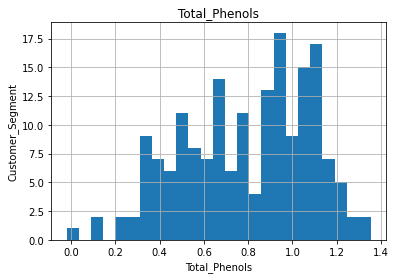

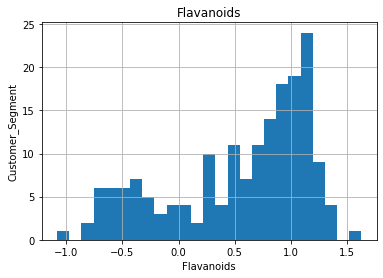

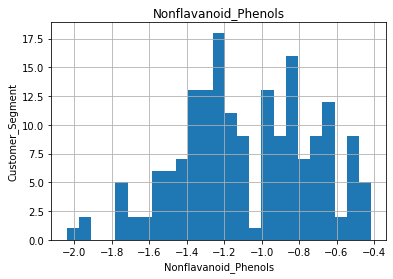

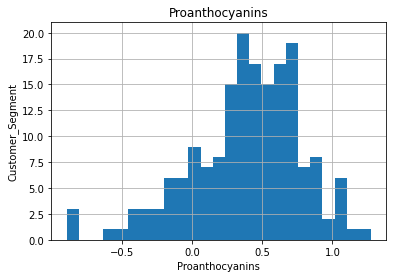

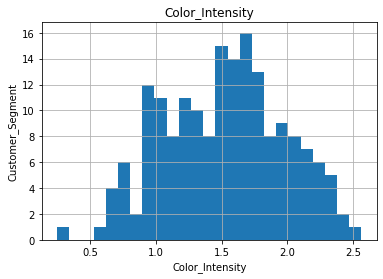

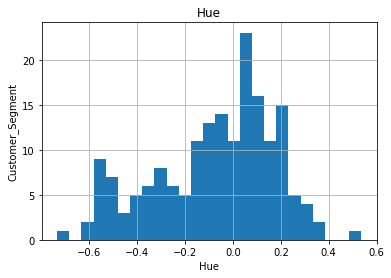

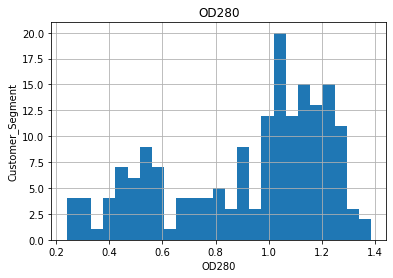

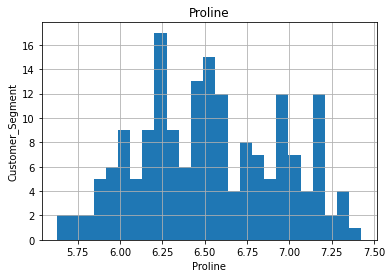

In [40]:
for feature in columns:
  data=wine_data.copy()
  data[feature].hist(bins=25)
  plt.xlabel(feature)
  plt.ylabel('Customer_Segment')
  plt.title(feature)
  plt.show()

In [41]:
wine_data[columns]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,2.655352,0.536493,0.887891,2.747271,4.844187,1.029619,1.118415,-1.272966,0.828552,1.729884,0.039221,1.366092,6.970730
1,2.580217,0.576613,0.760806,2.415914,4.605170,0.974560,1.015231,-1.347074,0.246860,1.477049,0.048790,1.223775,6.956545
2,2.577182,0.858662,0.982078,2.923162,4.615121,1.029619,1.175573,-1.203973,1.033184,1.736951,0.029559,1.153732,7.077498
3,2.665143,0.667829,0.916291,2.821379,4.727388,1.348073,1.249902,-1.427116,0.779325,2.054124,-0.150823,1.238374,7.299797
4,2.583243,0.951658,1.054312,3.044522,4.770685,1.029619,0.989541,-0.941609,0.598837,1.463255,0.039221,1.075002,6.599870
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2.618125,1.731656,0.896088,3.020425,4.553877,0.518794,-0.494296,-0.653926,0.058269,2.041220,-0.446287,0.553885,6.606650
174,2.595255,1.363537,0.908259,3.135494,4.624973,0.587787,-0.287682,-0.843970,0.343590,1.987874,-0.356675,0.444686,6.620073
175,2.585506,1.453953,0.815365,2.995732,4.787492,0.463734,-0.371064,-0.843970,0.300105,2.322388,-0.527633,0.444686,6.727432
176,2.577942,0.951658,0.862890,2.995732,4.787492,0.500775,-0.385662,-0.634878,0.378436,2.230014,-0.510826,0.482426,6.733402


## Since the data is in different range ,so we apply Scit-learn function to turn it into 0,1 range

In [42]:
scaler=MinMaxScaler()
scaler.fit(wine_data[columns])
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [43]:
scaler.transform(wine_data[columns])

array([[0.86048954, 0.40680598, 0.67099223, ..., 0.60858928, 0.98239074,
        0.74661632],
       [0.60668169, 0.42629151, 0.52407222, ..., 0.61612154, 0.85834383,
        0.73873127],
       [0.59642979, 0.5632771 , 0.7798795 , ..., 0.60098425, 0.7972916 ,
        0.80596721],
       ...,
       [0.62454798, 0.85239904, 0.58714638, ..., 0.16241048, 0.17926694,
        0.61137001],
       [0.59899568, 0.60844365, 0.6420889 , ..., 0.17563961, 0.2121625 ,
        0.61468875],
       [0.83666717, 0.83153124, 0.80979803, ..., 0.18865007, 0.20133467,
        0.38929612]])

In [44]:
updated_wine_data=pd.concat([wine_data['Customer_Segment'].reset_index(drop=True),
                            pd.DataFrame(scaler.transform(wine_data[columns]),columns=columns)],axis=1)

updated_wine_data

,Customer_Segment,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1,0.860490,0.406806,0.670992,0.371432,0.709917,0.762931,0.812547,0.472243,0.793808,0.639761,0.608589,0.982391,0.746616
1,1,0.606682,0.426292,0.524072,0.052925,0.425068,0.722918,0.774389,0.426629,0.525371,0.530691,0.616122,0.858344,0.738731
2,1,0.596430,0.563277,0.779880,0.540502,0.436926,0.762931,0.833684,0.514707,0.888241,0.642810,0.600984,0.797292,0.805967
3,1,0.893561,0.470593,0.703824,0.442666,0.570721,0.994359,0.861171,0.377363,0.771091,0.779635,0.459003,0.871069,0.929540
4,1,0.616903,0.608444,0.863387,0.657157,0.622320,0.762931,0.764888,0.676192,0.687799,0.524740,0.608589,0.728669,0.540460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,0.734737,0.987274,0.680468,0.633993,0.363939,0.391702,0.216157,0.853259,0.438341,0.774069,0.226439,0.274448,0.544229
174,3,0.657480,0.808486,0.694538,0.744601,0.448668,0.441841,0.292564,0.736288,0.570009,0.751056,0.296974,0.179267,0.551691
175,3,0.624548,0.852399,0.587146,0.610258,0.642350,0.351689,0.261729,0.736288,0.549942,0.895361,0.162410,0.179267,0.611370
176,3,0.598996,0.608444,0.642089,0.610258,0.642350,0.378607,0.256330,0.864983,0.586090,0.855512,0.175640,0.212162,0.614689


# **Now we find the 10 most important features**

In [45]:
X = updated_wine_data.iloc[:,1:13]  
y = updated_wine_data.iloc[:,0]
  
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feat_importances.nlargest(10))


[0.1420183  0.054977   0.03419707 0.05810644 0.04497831 0.08153747
 0.16143066 0.02800155 0.03320614 0.15841291 0.09217014 0.11096401]
Flavanoids         0.161431
Color_Intensity    0.158413
Alcohol            0.142018
OD280              0.110964
Hue                0.092170
Total_Phenols      0.081537
Ash_Alcanity       0.058106
Malic_Acid         0.054977
Magnesium          0.044978
Ash                0.034197
dtype: float64


# Split into train and test data

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [47]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [48]:
y_pred = clf.predict(X_test)

## Model accuracy for Decision Tree

In [49]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9322033898305084


In [50]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(random_state=0).fit(X_train, y_train)
log_predict_y=log_clf.predict(X_test)


## Model Accuracy for Logistic Regression

In [51]:

print("Accuracy:",metrics.accuracy_score(y_test, log_predict_y))

Accuracy: 0.9661016949152542


## Confusion Matrix for Decision Tree

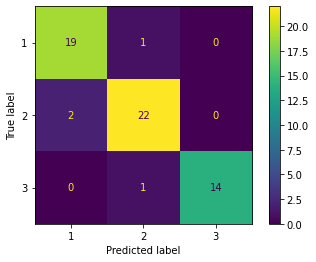

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf, X_test, y_test)
plt.show() 

## Confusion Matrix for Logistic Regression

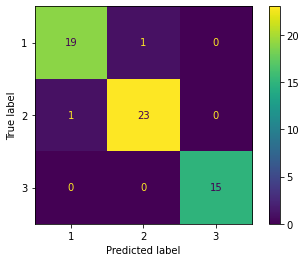

In [53]:
plot_confusion_matrix(log_clf, X_test, y_test)
plt.show() 

## F1 Score for Decision Tree

In [54]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, zero_division=1,average=None)

array([0.92682927, 0.91666667, 0.96551724])

## F1 Score for Logistic Regression 

In [55]:
f1_score(y_test,log_predict_y,zero_division=1,average=None)

array([0.95      , 0.95833333, 1.        ])

 

---

## Corelation

---



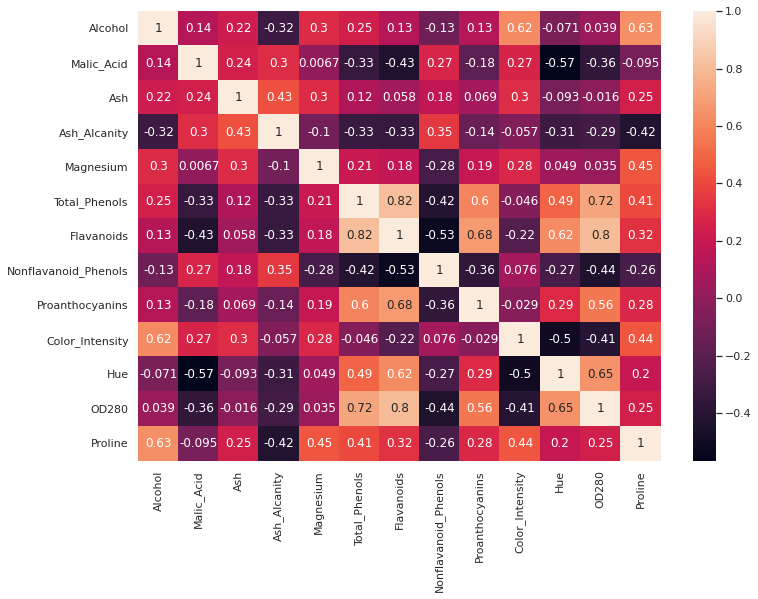

In [73]:
corr = updated_wine_data[columns].corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr, annot=True)

In [74]:
correlated_features = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.8:
            colname = corr.columns[i]
            correlated_features.add(colname)

In [75]:
print(correlated_features)
wine_data_arc=updated_wine_data[columns].drop(labels=correlated_features, axis=1).copy()
wine_data_arc

{'Flavanoids', 'OD280'}


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,Proline
0,0.860490,0.406806,0.670992,0.371432,0.709917,0.762931,0.472243,0.793808,0.639761,0.608589,0.746616
1,0.606682,0.426292,0.524072,0.052925,0.425068,0.722918,0.426629,0.525371,0.530691,0.616122,0.738731
2,0.596430,0.563277,0.779880,0.540502,0.436926,0.762931,0.514707,0.888241,0.642810,0.600984,0.805967
3,0.893561,0.470593,0.703824,0.442666,0.570721,0.994359,0.377363,0.771091,0.779635,0.459003,0.929540
4,0.616903,0.608444,0.863387,0.657157,0.622320,0.762931,0.676192,0.687799,0.524740,0.608589,0.540460
...,...,...,...,...,...,...,...,...,...,...,...
173,0.734737,0.987274,0.680468,0.633993,0.363939,0.391702,0.853259,0.438341,0.774069,0.226439,0.544229
174,0.657480,0.808486,0.694538,0.744601,0.448668,0.441841,0.736288,0.570009,0.751056,0.296974,0.551691
175,0.624548,0.852399,0.587146,0.610258,0.642350,0.351689,0.736288,0.549942,0.895361,0.162410,0.611370
176,0.598996,0.608444,0.642089,0.610258,0.642350,0.378607,0.864983,0.586090,0.855512,0.175640,0.614689


## After removing corelated features ,lets retrain the model see if it can be imporved

In [77]:
X_arc = wine_data_arc.copy() 
y_arc = updated_wine_data.iloc[:,0]
X_train_arc, X_test_arc, y_train_arc, y_test_arc = train_test_split(X_arc, y_arc, test_size=0.33, random_state=42)

## Training model with updated features 

# Decision Tree

In [78]:
clf_decision_arc = tree.DecisionTreeClassifier()
clf_decision_arc = clf_decision_arc.fit(X_train_arc, y_train_arc)

In [79]:
y_pred_dec_arc = clf_decision_arc.predict(X_test_arc)
print("Accuracy:",metrics.accuracy_score(y_test_arc, y_pred_dec_arc))

Accuracy: 0.8813559322033898


**F1 Score for Decsion Tree**

In [86]:
f1_score(y_test_arc, y_pred_dec_arc, zero_division=1,average=None)

array([0.86363636, 0.89361702, 0.88888889])

# Logistic Regression

In [84]:
log_clf_arc = LogisticRegression(random_state=0).fit(X_train_arc, y_train_arc)
log_predict_y_arc=log_clf_arc.predict(X_test_arc)

In [85]:
print("Accuracy:",metrics.accuracy_score(y_test_arc, log_predict_y_arc))

Accuracy: 1.0


**F1 Score for Logistic Regression**

In [87]:
f1_score(y_test_arc, log_predict_y_arc, zero_division=1,average=None)

array([1., 1., 1.])

# Wine Customer Segmentation
#Group 268 – **A V S S Surya Srinivas, Sukhdeep Singh, Ravinder Singh**
Introduction to Data Science
M.Tech Data Science and Engineering – Cluster Batch 4



# Overview


*   Objective – Customer Segmentation for Wine.
*   Methodology - The data are the results of a chemical analysis of wines
grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. Perform exploratory and explanatory analysis and segment the customers.



# Dataset


*   There are 13 features.
*   Size of the dataset is 178 Rows X 14 Columns.
*   Multiple files – Single File (wine.csv)
*   What kind of data – numerical
*   Data Distribution is observed as Imbalance.
*   Data was checked for missing values & null values and do not found any such cases.



# Feature Engineering Techniques


*   'Flavanoids', 'OD280' features were removed after correlation test.Models were trained with and without these features.
*   Class imbalance was treated by applying Log to the data set.
*   Since entire data set is numeric and not having same scale, Min-Max Scaling was applied to convert the data in the range between 0 to 1.



# Methodology

*   Top 10 Features are identified and listed.
*   The data was split into Training Set & Test Set considering 33% as Test Set Size.
*   Decision Tree Classifier and Logistic Regression were applied to predict.
*   Accuracy on Training Set and Test Set were arrived for both Decision Tree Classifier & Logistic Regression.



# Results


*   Table for the evaluation metric for each ML technique used was generated.
*   Confusion matrix for each type of ML technique (Logistic Regression & Decision Tree) were plotted.
*   Conclusion – It is found that the Accuracy of Logistic Regression is more than Decision Tree and Logistic Regression was best suited out of both the ML techniques employed.

